# Home Credit Default Risk

Outline:
* Load the data
* Join tables with Polars - a DataFrame library implemented in Rust language, very fast and memory efficient.  
* Create features
* Train models
* Create a submission table

## Load the data
Data loading and polars code credit: https://www.kaggle.com/code/jetakow/home-credit-2024-starter-notebook

In [1]:
import polars as pl
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score 
from src.classification import *
dataPath = "./data/"

## Data information
* basetable:
* static:
* static_cb:
 

In [2]:
# from  vectorization import *
#from data_reduction import *
compiled = pd.read_csv("W:/Erdos/Project/home_credit/data/csv_files/master_data_file.csv")

In [3]:
X = compiled.loc[:, compiled.columns != "target"]
y = compiled.loc[:, compiled.columns == "target"]
# vals= data_split(X, y, return_dfs=True)
train_loader, test_loader = data_split(X, y)


In [4]:
model = SimpleNN()  # Make sure to provide the correct input size

# Load the state dictionary from the .pth file
model.load_state_dict(torch.load('W:/Erdos/Project/home_credit/data/bestSimpleNN.pth'))


<All keys matched successfully>

GPU is available. Using the GPU...


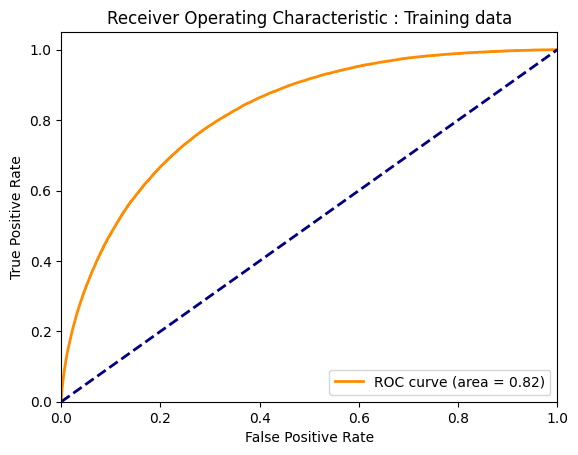

ROC AUC Score: 0.8214
GPU is available. Using the GPU...


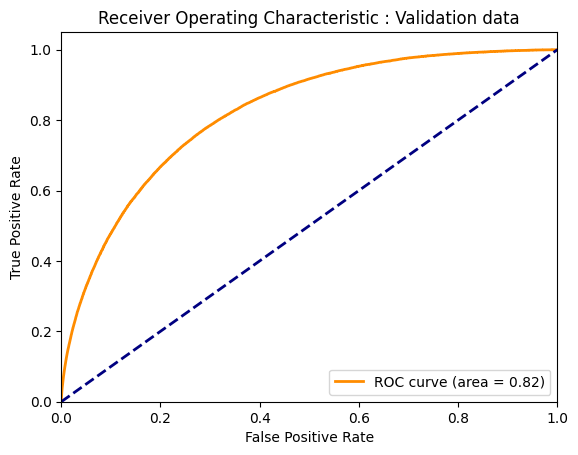

ROC AUC Score: 0.8214


In [5]:
train_avg_loss, train_y_scores, train_roc_auc  =evaluate_model(model,train_loader, plt_title="Training data")
val_avg__loss, val_y_scores, val_roc_auc  =evaluate_model(model,train_loader, plt_title="Validation data")

In [6]:
def gini_stability(base, w_fallingrate=88.0, w_resstd=-0.5):
    gini_in_time = base.loc[:, ["WEEK_NUM", "target", "score"]]\
        .sort_values("WEEK_NUM")\
        .groupby("WEEK_NUM")[["target", "score"]]\
        .apply(lambda x: 2*roc_auc_score(x["target"], x["score"])-1).tolist()
    
    x = np.arange(len(gini_in_time))
    y = gini_in_time
    a, b = np.polyfit(x, y, 1)
    y_hat = a*x + b
    residuals = y - y_hat
    res_std = np.std(residuals)
    avg_gini = np.mean(gini_in_time)
    return avg_gini + w_fallingrate * min(0, a) + w_resstd * res_std

In [9]:
X_train_df, X_val_df, y_train_df, y_val_df = data_split(X, y, return_dfs=True)

X_train_df['score'] = train_y_scores
X_train_df['target'] = y_train_df[y_train_df.columns[0]].values
X_val_df['score'] = val_y_scores
X_val_df['target'] = y_val_df[y_val_df.columns[0]].values


Returning DFs


ValueError: Length of values (1221327) does not match length of index (305332)

In [7]:


stability_score_train = gini_stability(base_train)
stability_score_valid = gini_stability(base_valid)
stability_score_test = gini_stability(base_test)

print(f'The stability score on the train set is: {stability_score_train}') 
print(f'The stability score on the valid set is: {stability_score_valid}') 
print(f'The stability score on the test set is: {stability_score_test}')  

NameError: name 'base_train' is not defined